In [1]:

!pip install numpy opencv-python matplotlib seaborn scikit-learn tensorflow keras


  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl (1.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1


You should consider upgrading via the 'C:\Users\Admin\Documents\GitHub\SEMESTER_5\PublicKeyCryptography\pythonProject\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
DATASET_DIR = "/content/drive/MyDrive/climatechange"

os.makedirs(DATASET_DIR, exist_ok=True)

import shutil

# Define the source and destination paths
source_path = "/content/dataset/Fruit And Vegetable Diseases Dataset"
destination_path = "/content/drive/MyDrive/climatechange/Fruit And Vegetable Diseases Dataset"

# Copy the folder and its contents
shutil.copytree(source_path, destination_path)


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/Fruit And Vegetable Diseases Dataset'

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install kaggle --quiet
!pip install opencv-python-headless
!pip install --upgrade tensorflow

import os

os.makedirs("root/.kaggle", exist_ok=True)
from google.colab import files
files.upload()

!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
!unzip -q fruit-and-vegetable-disease-healthy-vs-rotten.zip -d /content/dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 25.1 MB/s eta 0:00:00


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0


In [3]:
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

#data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

#building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import os
import cv2

path = r'/content/dataset/Fruit And Vegetable Diseases Dataset'

columns = [
    'Apple__Healthy', 'Apple__Rotten',
    'Banana__Healthy', 'Banana__Rotten',
    'Bellpepper__Healthy', 'Bellpepper__Rotten',
    'Carrot__Healthy', 'Carrot__Rotten',
    'Cucumber__Healthy', 'Cucumber__Rotten',
    'Grape__Healthy', 'Grape__Rotten',
    'Guava__Healthy', 'Guava__Rotten',
    'Jujube__Healthy', 'Jujube__Rotten',
    'Mango__Healthy', 'Mango__Rotten',
    'Orange__Healthy', 'Orange__Rotten',
    'Pomegranate__Healthy', 'Pomegranate__Rotten',
    'Potato__Healthy', 'Potato__Rotten',
    'Strawberry__Healthy', 'Strawberry__Rotten',
    'Tomato__Healthy', 'Tomato__Rotten'
]

class_labels = [
    'Apple Healthy', 'Apple Rotten',
    'Banana Healthy', 'Banana Rotten',
    'Bellpepper Healthy', 'Bellpepper Rotten',
    'Carrot Healthy', 'Carrot Rotten',
    'Cucumber Healthy', 'Cucumber Rotten',
    'Grape Healthy', 'Grape Rotten',
    'Guava Healthy', 'Guava Rotten',
    'Jujube Healthy', 'Jujube Rotten',
    'Mango Healthy', 'Mango Rotten',
    'Orange Healthy', 'Orange Rotten',
    'Pomegranate Healthy', 'Pomegranate Rotten',
    'Potato Healthy', 'Potato Rotten',
    'Strawberry Healthy', 'Strawberry Rotten',
    'Tomato Healthy', 'Tomato Rotten'
]

images = []
labels = []

for idx, folder in enumerate(columns):
    folder_path = os.path.join(path, folder)
    print('Loading -->', folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        image = cv2.imread(img_path)
        if image is not None:
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(idx)

print("Total images loaded:", len(images))
print("Total labels:", len(labels))


Loading --> Apple__Healthy
Loading --> Apple__Rotten
Loading --> Banana__Healthy
Loading --> Banana__Rotten
Loading --> Bellpepper__Healthy
Loading --> Bellpepper__Rotten
Loading --> Carrot__Healthy
Loading --> Carrot__Rotten
Loading --> Cucumber__Healthy
Loading --> Cucumber__Rotten
Loading --> Grape__Healthy
Loading --> Grape__Rotten
Loading --> Guava__Healthy
Loading --> Guava__Rotten
Loading --> Jujube__Healthy
Loading --> Jujube__Rotten
Loading --> Mango__Healthy
Loading --> Mango__Rotten
Loading --> Orange__Healthy
Loading --> Orange__Rotten
Loading --> Pomegranate__Healthy
Loading --> Pomegranate__Rotten
Loading --> Potato__Healthy
Loading --> Potato__Rotten
Loading --> Strawberry__Healthy
Loading --> Strawberry__Rotten
Loading --> Tomato__Healthy
Loading --> Tomato__Rotten
Total images loaded: 29291
Total labels: 29291


## Preparing image data for the CNN

In [6]:
data = np.array(images).astype('float32')
data = data / 255.0


labels = np.array(labels)

print(data.shape)

(29291, 128, 128, 3)


In [7]:
data, labels = shuffle(data, labels)

labels = to_categorical(labels, len(columns))
labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## Visualizing images from the dataset

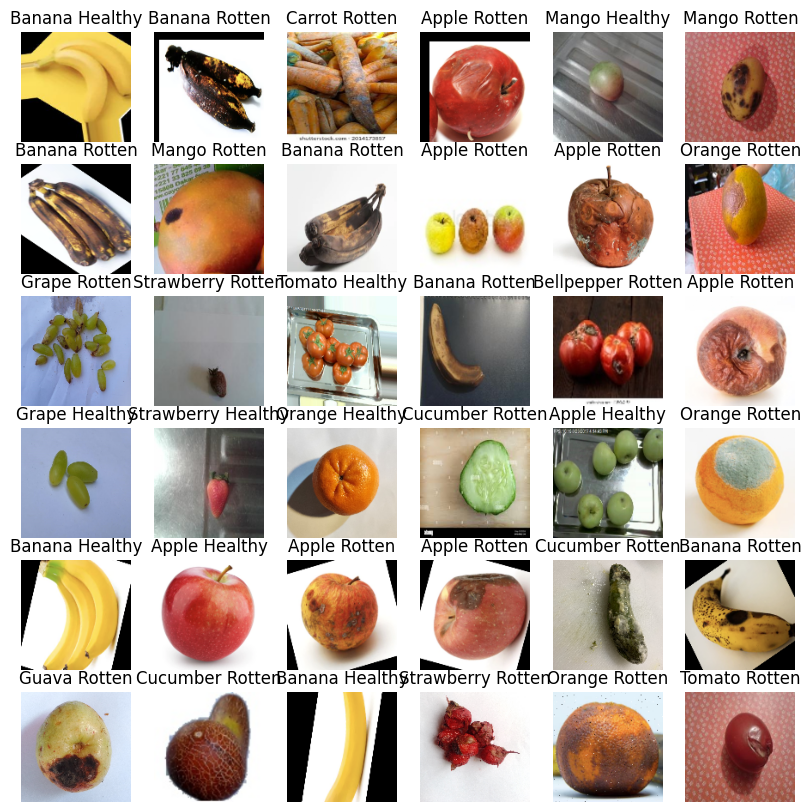

In [8]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(data), 36))):
    plt.subplot(6, 6, i+1)
    image = cv2.cvtColor(data[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_labels[labels[j].argmax()])

## Spliting the data into train and test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# 7. Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation, Add

def create_improved_model(input_shape=(128, 128, 3), num_classes=28):
    # Input layer
    inputs = Input(shape=input_shape)

    # First block - standard convolution for initial feature extraction
    x = Conv2D(16, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Second block - with residual connection
    residual = x
    x = SeparableConv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    residual = Conv2D(32, (1, 1), padding='same')(residual)  # Match dimensions
    x = Add()([x, residual])  # Add residual connection
    x = MaxPooling2D((2, 2))(x)

    # Third block - with residual connection
    residual = x
    x = SeparableConv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    residual = Conv2D(64, (1, 1), padding='same')(residual)  # Match dimensions
    x = Add()([x, residual])  # Add residual connection
    x = MaxPooling2D((2, 2))(x)

    # Fourth block
    x = SeparableConv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    # Global Average Pooling instead of Flatten + Dense
    x = GlobalAveragePooling2D()(x)

    # Final classification layer
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = create_improved_model()
model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 16)   │             64 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 16)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 16)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 64, 64, 32)     │            688 │ max_pooling2d[0][0]    │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 32)     │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 64, 64, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 32)     │            544 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64, 64, 32)     │              0 │ activation_1[0][0],    │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 32)     │              0 │ add[0][0]              │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 32, 32, 64)     │          2,400 │ max_pooling2d_1[0][0]  │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 64)     │            256 │ separable_conv2d_1[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 64)     │          2,112 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)          

 Total params: 26,124 (102.05 KB)

 Trainable params: 25,644 (100.17 KB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)
model.save("fruit_veg_classifier1.h5")

 82/367 ━━━━━━━━━━━━━━━━━━━━ 9:00 2s/step - accuracy: 0.1476 - loss: 2.9775

## Building the model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()

model.add(Conv2D(filters=9, kernel_size=(5, 5), padding='same', input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))

model.add(Dense(28, activation="softmax"))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 9)         │             684 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128, 128, 9)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 42, 42, 9)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 42, 42, 64)          │          14,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 28)                  │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,967,496 (7.51 MB)

 Trainable params: 1,967,496 (7.51 MB)

 Non-trainable params: 0 (0.00 B)

## Configuring the model + Training

In [23]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("fruit_veg_classifier4.h5")

# Compile and train
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)

149/184 ━━━━━━━━━━━━━━━━━━━━ 1:25 2s/step - accuracy: 0.6133 - loss: 2.1080

KeyboardInterrupt: 

In [9]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("fruit_veg_classifier4.h5")

# Evaluate the model on validation/test data
validation_results = model.evaluate(x_test, y_test, batch_size=64)
print(f"Test loss: {validation_results[0]}")
print(f"Test accuracy: {validation_results[1]}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 250ms/step - accuracy: 0.6820 - loss: 6.9554
Test loss: 6.888123989105225
Test accuracy: 0.6828810572624207


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

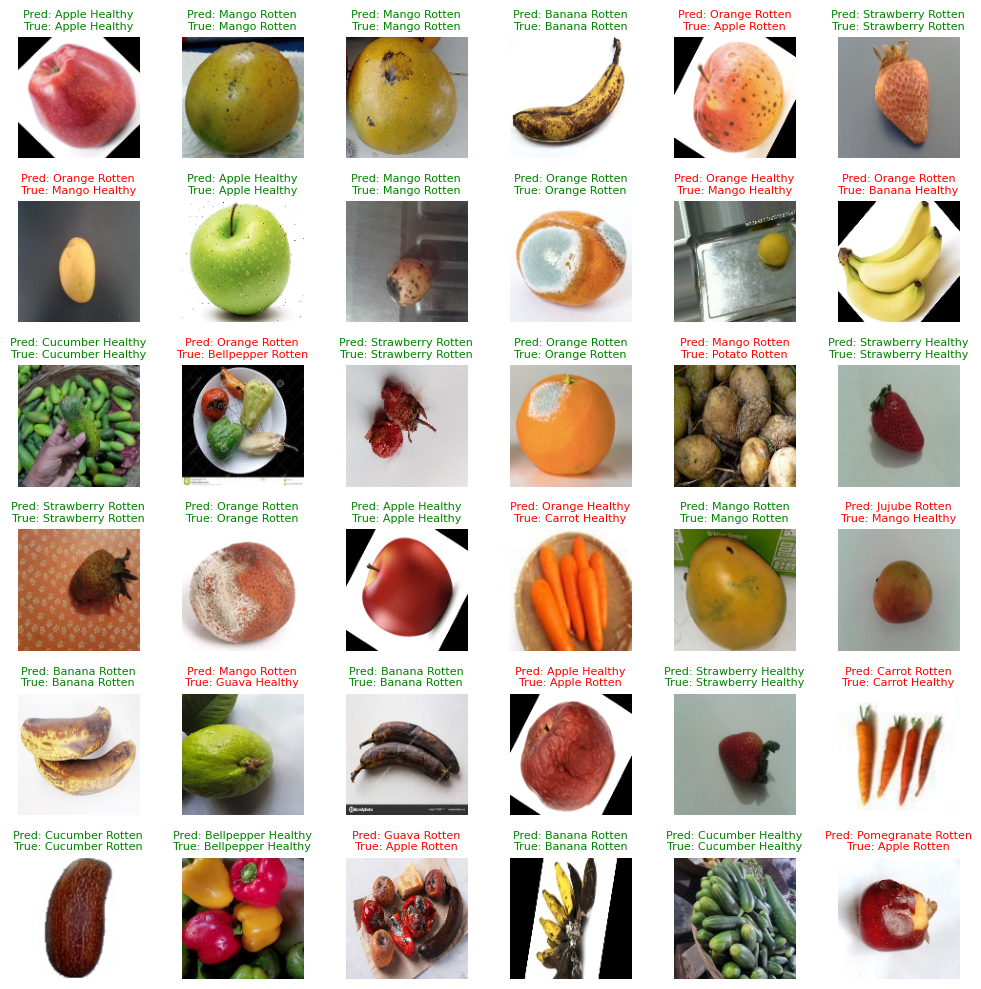

In [11]:
plt.figure(figsize=(10, 10))

for i, j in enumerate(list(np.random.randint(0, len(x_test), 36))):
    plt.subplot(6, 6, i+1)

    image = cv2.cvtColor(x_test[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")

    predictions = model.predict(np.expand_dims(x_test[j], axis=0))
    predicted_class_idx = np.argmax(predictions)
    ground_truth_idx = np.argmax(y_test[j])

    # Get class names
    predicted_class = class_labels[predicted_class_idx]
    true_class = class_labels[ground_truth_idx]

    # Set title color based on prediction accuracy
    title_color = 'green' if predicted_class_idx == ground_truth_idx else 'red'

    # Display both prediction and ground truth
    plt.title(f"Pred: {predicted_class}\nTrue: {true_class}",
              color=title_color, fontsize=8)

plt.tight_layout()
plt.show()

In [12]:


# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=64)

# Save the entire model (architecture + weights + optimizer state)
model.save("fruit_veg_classifier_bigger_model.h5")

  7/367 ━━━━━━━━━━━━━━━━━━━━ 1:00:36 10s/step - accuracy: 0.0802 - loss: 4.1068

KeyboardInterrupt: 

## Visualising the loss decrease

## Visualising the accuracy on training and validation

## Confusion Matrix

131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step


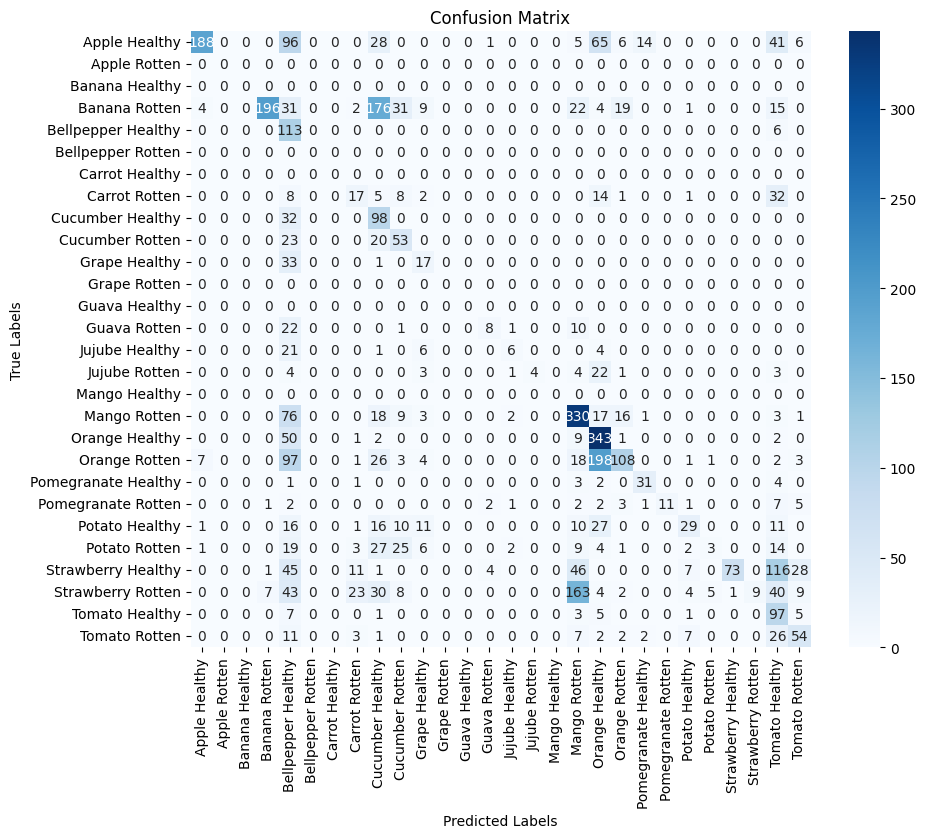

Classification Report:
                     precision    recall  f1-score   support

      Apple Healthy       0.94      0.42      0.58       450
       Apple Rotten       0.00      0.00      0.00         0
     Banana Healthy       0.00      0.00      0.00         0
      Banana Rotten       0.96      0.38      0.55       510
 Bellpepper Healthy       0.15      0.95      0.26       119
  Bellpepper Rotten       0.00      0.00      0.00         0
     Carrot Healthy       0.00      0.00      0.00         0
      Carrot Rotten       0.27      0.19      0.23        88
   Cucumber Healthy       0.22      0.75      0.34       130
    Cucumber Rotten       0.36      0.55      0.43        96
      Grape Healthy       0.28      0.33      0.30        51
       Grape Rotten       0.00      0.00      0.00         0
      Guava Healthy       0.00      0.00      0.00         0
       Guava Rotten       0.53      0.19      0.28        42
     Jujube Healthy       0.46      0.16      0.24        38


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

labels = list(range(len(class_labels)))

#compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, labels=labels)

#plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, labels=labels, target_names=class_labels, zero_division=0))


In [ ]:
# import cv2

# def predict_single_image(image_path, model, class_labels):
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, (128, 128))
#     image = np.expand_dims(image, axis=0)
#     image = image / 255.0  #normalize

#     #predict using the model
#     predictions = model.predict(image)
#     predicted_class = np.argmax(predictions)
#     print("Predicted Class:", class_labels[predicted_class])

#     return predicted_class

# image_path = '/content/dataset/Fruit And Vegetable Diseases Dataset/Apple__Healthy/FreshApple (149).jpg'
# predicted_class = predict_single_image(image_path, model, class_labels)

In [ ]:


# def visualize_predictions(data, labels, model, class_labels, num_samples=36):
#     if len(data) == 0 or len(labels) == 0:
#         print("[ERROR] Data or labels are empty.")
#         return

#     num_samples = min(num_samples, len(data))
#     plt.figure(figsize=(15, 15))

#     random_indices = np.random.choice(len(data), num_samples, replace=False)
#     print(random_indices)

#     for i, idx in enumerate(random_indices):
#         plt.subplot(6, 6, i + 1)

#         image = data[idx]

#         try:
#           true_idx = np.argmax(labels[idx]) if len(labels[idx]) == len(class_labels) else None
#           true_label = class_labels[true_idx] if true_idx is not None and true_idx < len(class_labels) else "Unknown"
#         except Exception as e:
#             true_label = "Unknown"
#             print(f"[WARN] True label fallback at index {idx}: {e}")

#         predicted_class_idx = predict_single_image(image, model, class_labels)
#         predicted_label = class_labels[predicted_class_idx]

#         image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.imshow(image_rgb)
#         plt.axis("off")

#         color = 'green' if predicted_label == true_label else 'red'
#         plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color, fontsize=8)

#     plt.tight_layout()
#     plt.savefig("debug_grid_output.png")
#     print("[INFO] Saved prediction grid to debug_grid_output.png")

# # To use:
# visualize_predictions(data, labels, model, class_labels)
